In [2]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [131]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('jfkweather.csv')

In [132]:
df['date']= pd.date_range(start='1/1/2019', end='12/31/2019')

In [133]:
df['date'] = pd.to_datetime(df['date'])

In [134]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return '4'
    if date in seasons['summer']:
        return '3'
    if date in seasons['autumn']:
        return '2'
    else:
        return '1'


# Assuming df has a date column of type `datetime`
df['season'] = df.date.map(season_of_date)

In [135]:
df['month'] = df['date'].dt.month

In [136]:
# cols = list(df.columns)
# cols = [cols[-1]] + cols[:-1]
# df = df[cols]

In [137]:
df['date'] = pd.to_datetime(df['date'])

In [138]:
df = df.set_index('date')

In [139]:
df['precipAccumulation'].fillna(0,inplace=True)

In [141]:
df.columns

Index(['time', 'summary', 'icon', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensity', 'precipIntensityMax', 'precipIntensityMaxTime',
       'precipProbability', 'precipType', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'windGust', 'windGustTime',
       'windBearing', 'cloudCover', 'uvIndex', 'uvIndexTime', 'visibility',
       'ozone', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'precipAccumulation', 'season', 'month'],
      dtype='object')

In [142]:
df['precipType'].value_counts()

rain    317
snow     47
Name: precipType, dtype: int64

In [144]:
df['precipIntensity'].value_counts()

0.0002    86
0.0001    57
0.0003    37
0.0004    12
0.0005     9
          ..
0.0151     1
0.0150     1
0.0052     1
0.0465     1
0.0000     1
Name: precipIntensity, Length: 97, dtype: int64

In [145]:
df[df['precipType']=='snow']

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-08,1546837200,Light rain in the evening and overnight.,snow,1546863600,1546897500,0.06,0.0001,0.0006,1546851600,0.69,snow,31.44,1546905600,30.45,1546907340,30.83,1546898580,24.67,1546919760,8.02,0.40,1030.4,9.87,19.15,1546840500,350,0.51,2,1546881720,10.000,225.0,24.86,1546864200,34.36,1546920000,15.58,1546864140,30.83,1546898580,0.02,1,1
2019-01-11,1547096400,Windy in the afternoon.,wind,1547122800,1547156880,0.15,0.0002,0.0007,1547147040,0.09,snow,35.61,1547136120,21.08,1547209920,23.96,1547136060,7.52,1547210940,16.77,0.51,1007.5,19.49,39.45,1547146800,300,0.62,1,1547139240,10.000,341.0,28.44,1547179200,35.61,1547136120,16.23,1547179200,23.96,1547136060,0.04,1,1
2019-01-13,1547269200,Mostly cloudy throughout the day.,partly-cloudy-day,1547295540,1547329800,0.21,0.0002,0.0006,1547297820,0.06,snow,34.55,1547325540,24.63,1547383380,29.76,1547326800,15.12,1547383680,7.45,0.43,1033.3,6.24,10.51,1547286540,327,0.51,2,1547312580,10.000,317.3,19.70,1547287320,34.55,1547325540,8.81,1547287020,29.76,1547326800,0.06,1,1
2019-01-14,1547355600,Mostly cloudy throughout the day.,partly-cloudy-day,1547381940,1547416260,0.24,0.0005,0.0023,1547362020,0.14,snow,33.97,1547409900,23.91,1547463060,24.23,1547409960,12.04,1547470620,12.18,0.50,1029.5,10.93,15.81,1547430540,35,0.69,2,1547399100,9.596,311.0,24.63,1547383380,33.97,1547409900,15.12,1547383680,24.23,1547409960,0.12,1,1
2019-01-15,1547442000,Partly cloudy throughout the day.,partly-cloudy-day,1547468280,1547502720,0.28,0.0002,0.0006,1547470800,0.06,snow,33.00,1547498280,24.48,1547549460,25.35,1547497020,16.65,1547557140,14.26,0.57,1023.6,11.57,16.19,1547472960,3,0.45,2,1547486160,10.000,320.2,23.91,1547463060,33.00,1547498280,12.04,1547470620,25.35,1547497020,0.04,1,1
2019-01-16,1547528400,Partly cloudy throughout the day.,clear-day,1547554680,1547589180,0.31,0.0003,0.0006,1547535600,0.02,snow,36.55,1547584740,27.55,1547611260,31.31,1547596800,19.18,1547638380,13.68,0.52,1020.7,6.51,12.70,1547568600,338,0.17,2,1547572080,10.000,328.7,24.48,1547549460,36.55,1547584740,16.65,1547557140,31.61,1547597820,0.05,1,1
2019-01-17,1547614800,Mostly cloudy throughout the day.,partly-cloudy-day,1547641080,1547675640,0.34,0.0003,0.0006,1547631720,0.03,snow,40.11,1547673780,24.60,1547724000,31.97,1547673180,15.86,1547722800,22.74,0.64,1019.1,11.69,15.52,1547657220,264,0.48,2,1547658240,9.920,317.8,28.11,1547624160,40.11,1547673780,19.18,1547638380,31.97,1547673180,0.02,1,1
2019-01-18,1547701200,Light snow overnight.,partly-cloudy-day,1547727420,1547762160,0.38,0.0002,0.0005,1547776920,0.02,snow,33.89,1547751600,28.68,1547803920,29.42,1547751540,22.51,1547798580,10.46,0.45,1027.5,7.96,13.95,1547703480,14,0.60,2,1547744160,10.000,309.3,24.60,1547724000,34.15,1547701200,15.86,1547722800,29.42,1547751540,0.05,1,1
2019-01-19,1547787600,Light snow (< 1 in.) in the morning.,snow,1547813820,1547848620,0.42,0.0012,0.0062,1547802780,0.84,snow,39.57,1547834580,29.72,1547893620,37.44,1547831100,23.42,1547893920,29.74,0.83,1020.2,6.43,11.77,1547852400,307,0.91,2,1547830800,8.189,313.2,28.68,1547803920,39.57,1547834580,22.51,1547798580,37.44,1547831100,0.24,1,1


In [147]:
df[(df['precipType'] =='snow' ) & (df['icon'] == 'snow')] 


,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-08,1546837200,Light rain in the evening and overnight.,snow,1546863600,1546897500,0.06,0.0001,0.0006,1546851600,0.69,snow,31.44,1546905600,30.45,1546907340,30.83,1546898580,24.67,1546919760,8.02,0.40,1030.4,9.87,19.15,1546840500,350,0.51,2,1546881720,10.000,225.0,24.86,1546864200,34.36,1546920000,15.58,1546864140,30.83,1546898580,0.02,1,1
2019-01-19,1547787600,Light snow (< 1 in.) in the morning.,snow,1547813820,1547848620,0.42,0.0012,0.0062,1547802780,0.84,snow,39.57,1547834580,29.72,1547893620,37.44,1547831100,23.42,1547893920,29.74,0.83,1020.2,6.43,11.77,1547852400,307,0.91,2,1547830800,8.189,313.2,28.68,1547803920,39.57,1547834580,22.51,1547798580,37.44,1547831100,0.24,1,1
2019-02-18,1550379600,Light rain overnight.,snow,1550404080,1550442780,0.44,0.0006,0.0161,1550462400,0.86,snow,35.74,1550423040,33.43,1550468700,30.99,1550421420,26.28,1550481180,17.73,0.57,1019.0,8.96,15.43,1550386800,31,0.46,3,1550422260,9.968,313.6,25.04,1550404380,35.74,1550423040,15.47,1550394240,30.99,1550421420,0.06,1,2
2019-02-21,1550638800,Rain (with a chance of 1–3 in. of snow) starti...,snow,1550663040,1550702220,0.56,0.0121,0.0434,1550721600,0.92,snow,32.21,1550707200,31.22,1550707200,24.45,1550675220,22.85,1550707200,17.87,0.65,1032.8,7.28,11.08,1550707320,76,0.81,3,1550682420,6.506,278.6,26.36,1550686800,34.48,1550721600,18.90,1550687400,26.71,1550718420,1.61,1,2
2019-03-01,1551330000,Light snow in the morning.,snow,1551353520,1551393960,0.83,0.0007,0.0073,1551344280,0.76,snow,36.67,1551383160,26.29,1551439320,28.40,1551384120,18.46,1551438480,17.13,0.59,1020.9,10.34,16.43,1551362760,4,0.61,4,1551373560,8.998,307.4,26.75,1551340140,36.67,1551383160,19.57,1551355260,28.40,1551384120,0.15,1,3
2019-03-02,1551416400,Snow (< 1 in.) in the morning and overnight.,snow,1551439800,1551480420,0.86,0.0018,0.0106,1551441240,0.84,snow,37.89,1551470400,29.97,1551525840,30.77,1551470580,20.22,1551525600,23.61,0.71,1026.3,8.90,13.11,1551499200,56,0.98,3,1551459840,8.731,314.1,26.29,1551439320,37.89,1551470400,18.46,1551438480,30.77,1551470580,0.35,1,3
2019-03-03,1551502800,Snow (1–2 in.) in the morning.,snow,1551526140,1551566880,0.89,0.0157,0.0681,1551515280,0.93,snow,38.37,1551559560,34.60,1551611340,33.79,1551559200,27.67,1551611700,30.22,0.83,1017.8,10.42,17.66,1551538740,343,0.96,3,1551546840,7.099,346.5,29.97,1551525840,39.31,1551574740,20.22,1551525600,33.79,1551559200,1.78,1,3
2019-03-04,1551589200,Snow (2–4 in.) in the evening and overnight.,snow,1551612420,1551653400,0.92,0.0126,0.0941,1551668400,0.92,snow,41.76,1551634140,32.01,1551667560,38.87,1551633540,23.42,1551682500,27.68,0.71,1018.4,7.30,17.11,1551589200,354,0.71,4,1551632520,7.829,339.8,32.01,1551667560,41.76,1551634140,25.69,1551668940,38.87,1551633540,1.51,1,3
2019-12-04,1575349200,Partly cloudy throughout the day.,snow,1575374580,1575408600,0.24,0.0020,0.0234,1575349200,0.60,snow,38.53,1575400020,31.94,1575430320,28.00,1575400020,22.22,1575430260,25.15,0.71,1000.6,17.05,33.47,1575356340,322,0.58,1,1575392460,8.777,374.8,31.04,1575377640,38.53,1575400020,20.26,1575352260,28.00,1575400020,0.34,2,12


In [157]:
import matplotlib.pyplot as plt

In [164]:

season = df.groupby('season').agg({'precipProbability': ['mean']})
season

,precipProbability
,mean
season,
1,0.389667
2,0.446854
3,0.372553
4,0.577500


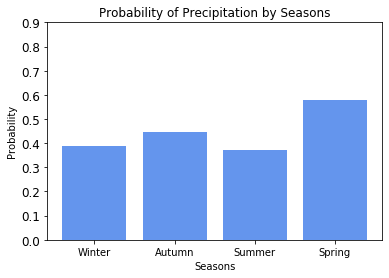

In [167]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Winter','Autumn','Summer','Spring'],season.values.flatten(), color = 'cornflowerblue')

# Set the x-axis tick labels to the country names
#
ax.set_xlabel('Seasons')
# Set the y-axis label
ax.set_ylabel('Probability')
plt.yticks(np.arange(0, 1, step=.1),fontsize=12)
ax.set_title('Probability of Precipitation by Seasons')

#plt.savefig('graph3.png',dpi=None,bbox_inches = 'tight')
plt.show()

In [ ]:
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]